# Road Traffic Accidents Analysis

In [1]:
# import general required libraries
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import sqlite3
import pandas as pd

# Create an SQL statement to extract data need needed for this section

Here, I tried to select some useful columns that are necessary for this analysis from each tables instead of marging all columns on all the tables together. This is to avoid repetitions of values and also avoid redundancy.

So some of the columns selected includes:
    
    On Accident table: accident_year, accident_severity, number_of_casualties, day_of_week, time, road_surface_conditions, road_type, light_conditions, weather_conditions, speed_limit, pedestrian_crossing_human_control, pedestrian_crossing_physical_facilities, casualty_severity, 
    On Casualty table: casualty_class, casualty_type, pedestrian_location, pedestrian_road_maintenance_worker
    On Vehicle table: vehicle_type, vehicle_manoeuvre, vehicle_location_restricted_lane, sex_of_driver, age_of_driver, vehicle.engine_capacity_cc, vehicle.age_of_vehicle

In [2]:
accident_data = ''
# Create a function to read all records in accident table and form a dataframe object from it.
def readDataFromTable():
    
    global accident_data
    try:
        # make a connection to sqlite database
        sqlConnection = sqlite3.connect('accident_data_v1.0.0_2023.db')
        cursor = sqlConnection.cursor()
        print("Connected to SQLite")
        # select the colomns required for analysis from the tables for year 2020
        sql_select_query = """
            SELECT accident.accident_year, accident.accident_severity, accident.number_of_casualties, accident.day_of_week, accident.time, 
            accident.road_surface_conditions, accident.road_type, accident.light_conditions, accident.weather_conditions, accident.speed_limit, 
            accident.pedestrian_crossing_human_control, accident.pedestrian_crossing_physical_facilities, casualty.casualty_severity, 
            casualty.casualty_class, casualty.casualty_type, casualty.pedestrian_location, casualty.pedestrian_road_maintenance_worker, 
            vehicle.vehicle_type, vehicle.vehicle_manoeuvre, vehicle.vehicle_location_restricted_lane, vehicle.sex_of_driver, vehicle.age_of_driver, 
            vehicle.engine_capacity_cc, vehicle.age_of_vehicle 
            FROM casualty JOIN vehicle ON casualty.accident_reference = vehicle.accident_reference JOIN accident ON 
            vehicle.accident_reference = accident.accident_reference WHERE accident.accident_year=2020;
        """
        
        # get all the columns of the table
        sqlConnection.row_factory = sqlite3.Row
        columns = sqlConnection.execute(sql_select_query)
        row = columns.fetchone()
        column_names = row.keys()
        
        # get all records from accident table
        cursor.execute(sql_select_query)
        records = cursor.fetchall()
        print("Total rows are:  ", len(records))
        
        # form a dataframe object from the records
        accident_data = pd.DataFrame(records, columns=column_names)
        
        # close the connection
        cursor.close()

    except sqlite3.Error as error:
        print("Failed to read data from sqlite table", error)
    finally:
        if sqlConnection:
            sqlConnection.close()
            print("The connection is closed")

readDataFromTable()

# display a sample of the records in the dataframe object
accident_data.head()

Connected to SQLite
Total rows are:   221631
The connection is closed


,accident_year,accident_severity,number_of_casualties,day_of_week,time,road_surface_conditions,road_type,light_conditions,weather_conditions,speed_limit,...,casualty_type,pedestrian_location,pedestrian_road_maintenance_worker,vehicle_type,vehicle_manoeuvre,vehicle_location_restricted_lane,sex_of_driver,age_of_driver,engine_capacity_cc,age_of_vehicle
0,2020,3,1,3,09:00,9,6,1,9,20,...,0,9,0,9,5,0,2,32,1968,6
1,2020,3,2,2,13:55,1,6,1,1,20,...,0,1,0,9,4,0,1,45,1395,2
2,2020,3,2,2,13:55,1,6,1,1,20,...,0,1,0,9,4,0,1,45,1395,2
3,2020,3,1,4,01:25,2,6,4,1,30,...,0,5,0,9,18,0,3,-1,-1,-1
4,2020,2,1,4,01:50,1,6,4,1,30,...,0,4,0,8,18,0,1,44,1798,8


# Perform data Exploratory

Here I checked to see if all selected data are from year 2020 as requested using unique() funtion on year column. 

I also checked for general insight into the data using info() function. 

Lastly, I checked for null values and using isnull() function and I observed non of the fields contains null value.

In [3]:
# check if only year 2020 was extracted from the accident table
accident_data.accident_year.unique()

array([2020], dtype=int64)

In [4]:
# checking for basic information about the dataset
accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221631 entries, 0 to 221630
Data columns (total 24 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   accident_year                            221631 non-null  int64 
 1   accident_severity                        221631 non-null  int64 
 2   number_of_casualties                     221631 non-null  int64 
 3   day_of_week                              221631 non-null  int64 
 4   time                                     221631 non-null  object
 5   road_surface_conditions                  221631 non-null  int64 
 6   road_type                                221631 non-null  int64 
 7   light_conditions                         221631 non-null  int64 
 8   weather_conditions                       221631 non-null  int64 
 9   speed_limit                              221631 non-null  int64 
 10  pedestrian_crossing_human_control        221

### The output above shows that the dataset has 221631 rows against 24 columns. Each column is completed with no none values. It also contains 23 integer type and one string type

In [5]:
# Further verifying if all the columns are clean without none value
accident_data.isnull().sum()

accident_year                              0
accident_severity                          0
number_of_casualties                       0
day_of_week                                0
time                                       0
road_surface_conditions                    0
road_type                                  0
light_conditions                           0
weather_conditions                         0
speed_limit                                0
pedestrian_crossing_human_control          0
pedestrian_crossing_physical_facilities    0
casualty_severity                          0
casualty_class                             0
casualty_type                              0
pedestrian_location                        0
pedestrian_road_maintenance_worker         0
vehicle_type                               0
vehicle_manoeuvre                          0
vehicle_location_restricted_lane           0
sex_of_driver                              0
age_of_driver                              0
engine_cap

# Data Processing 

In order to make it days of the week more readable, I tried to convert each number to it's equivalent day of the week.

I also convert and extract hour of the day from the time column.

In [6]:
# Conver days of the week to their equivalent names so it can be use as index of our analysis
accident_data['day_of_week'].replace({1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday',
                                      7:'Saturday'}, inplace = True)

In [7]:
# Build a function to get hour of the day from the 'time column' so it can be used to get hour an accident occurs
# get_hour = accident_data.iloc[:,:5]
# get_hour["hour_of_day"] = get_hour["time"].str.slice(0,2)

def convert_to_datetime(col):
    accident_data["hour_of_day"] = pd.to_datetime(np.array(accident_data['time'])).hour


get_hour = convert_to_datetime(accident_data["time"])

C:\Users\Hp\AppData\Local\Temp\ipykernel_25740\2600175585.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  accident_data["hour_of_day"] = pd.to_datetime(np.array(accident_data['time'])).hour


# Data Analysis

# Question 1

### Are there significant hours of the day and days of the week on which accident occur?

In [43]:
# Group all casualties in an accident that happened per each day of the week for year 2020
day_of_week = accident_data.pivot_table('number_of_casualties', index='day_of_week', columns='accident_year', aggfunc='sum')
day_of_week

accident_year,2020
day_of_week,
Friday,61896
Monday,52099
Saturday,55509
Sunday,47960
Thursday,58171
Tuesday,53331
Wednesday,55979


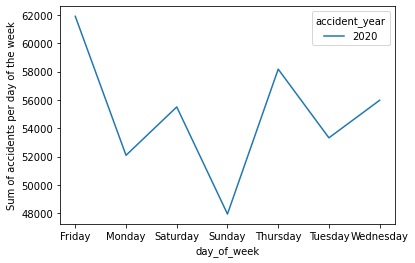

In [46]:
#  We can visualize the trend in each group using a line plot
accident_data.pivot_table('number_of_casualties', index='day_of_week', columns='accident_year', aggfunc='sum').plot()
plt.ylabel('Sum of accidents per day of the week');

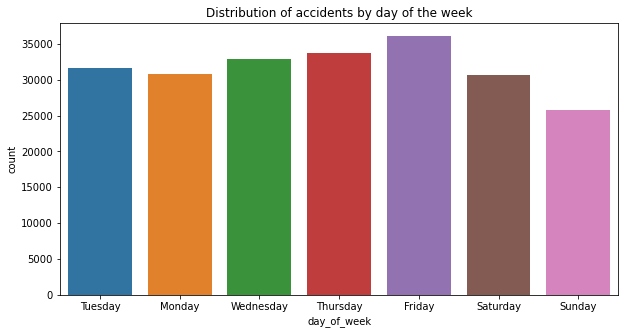

In [47]:
# We can also see the distribution of accident by day of the week using bar chart
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x=accident_data.day_of_week)
ax.set_title('Distribution of accidents by day of the week');

### From the two graphs above, it is significant that most accidents occured on Fridays and Thursdays and less on Sunday.

In [58]:
# Group all casualties in an accident that happened per each time of the day for year 2020
get_hour = accident_data.pivot_table('number_of_casualties', index='hour_of_day', 
                                        columns='accident_year', aggfunc='sum', fill_value=0).head()
get_hour

accident_year,2020
hour_of_day,
0,5018
1,3722
2,2533
3,2327
4,1713


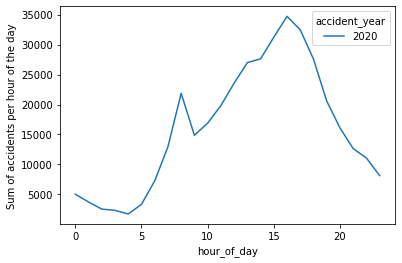

In [65]:
#  We can visualize the trend in each group using a line plot
accident_data.pivot_table('number_of_casualties', index='hour_of_day', columns='accident_year', aggfunc='sum').plot()
plt.ylabel('Sum of accidents per hour of the day');

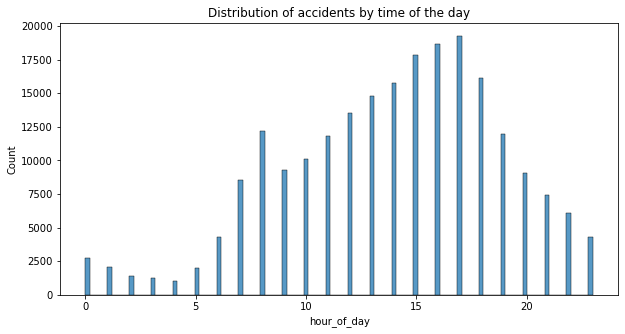

In [67]:
# We can also see the distribution of accident by hours of the day using bar chart
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(accident_data["hour_of_day"])
ax.set_title('Distribution of accidents by time of the day');

### The two graphs above show that the time of the day which accidents occur mostly is in the morning at 8:00 in the morning when people are rushing to work. Also, there is significant portion in a day that accident also happen which is from 15:00 to 18:00 that can be classified under rush hour in the afternoon to evening when people are going back home.

# Question 2

### For motorbikes, are there significant hours of the day and days of the week, on which accident occur for motorbike of type motorcycle 125cc and under, motorcycle 125cc and up to 500cc and motocycle over 500cc 

In [68]:
# These motorcycle types are represented in the 'vehicle_type' column with number 2,3,4 and 5 so we extract them 
# from the dataser
motorcycle_data = accident_data[accident_data['vehicle_type'].isin([2,3,4,5])].copy()
motorcycle_data

,accident_year,accident_severity,number_of_casualties,day_of_week,time,road_surface_conditions,road_type,light_conditions,weather_conditions,speed_limit,...,pedestrian_location,pedestrian_road_maintenance_worker,vehicle_type,vehicle_manoeuvre,vehicle_location_restricted_lane,sex_of_driver,age_of_driver,engine_capacity_cc,age_of_vehicle,hour_of_day
14,2020,3,1,Wednesday,03:25,1,3,4,1,30,...,0,0,3,3,0,1,37,114,5,3
46,2020,2,1,Wednesday,08:00,1,6,1,1,30,...,0,0,2,18,9,1,19,-1,-1,8
48,2020,3,1,Wednesday,14:00,1,6,1,1,20,...,6,0,3,18,9,3,-1,-1,-1,14
51,2020,3,1,Wednesday,14:37,1,3,1,1,30,...,0,0,3,18,0,1,20,125,4,14
78,2020,3,1,Wednesday,19:05,1,6,4,1,30,...,5,0,3,14,0,1,20,125,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221367,2020,3,1,Thursday,16:30,1,6,4,1,30,...,0,0,3,14,0,1,47,124,17,16
221513,2020,3,1,Wednesday,17:30,2,6,4,8,30,...,0,0,3,5,0,1,61,124,4,17
221527,2020,2,1,Monday,17:55,1,6,4,1,30,...,0,0,3,18,0,1,35,125,3,17
221529,2020,3,1,Thursday,15:45,1,6,1,1,20,...,0,0,4,18,0,1,48,250,5,15


## Perform Data Transformation

In [71]:
# we try to transform the 'vehicle_type' column number to their individual motorcycle value
motorcycle_data['vehicle_type'].replace({2:'Motorcycle 50cc and under', 3:'Motorcycle over 50cc and up to 125cc', 4:'Motorcycle over 125cc and up to 500cc', 5:'Motorcycle over 500cc'}, inplace = True)

# get hour of the day from the 'time column' so it can be used to get hour an accident occurs
motorcycle_data["hour_of_day"] = pd.to_datetime(np.array(motorcycle_data['time'])).hour

## Data Analysis

In [72]:
# Group all casualties in an accident that happened per each hour of the day for year 2020 for motocycles
hour_of_day = motorcycle_data.pivot_table('number_of_casualties', index=['hour_of_day'], 
                                        columns='vehicle_type', aggfunc='sum', fill_value=0)
hour_of_day.head()

vehicle_type,Motorcycle 50cc and under,Motorcycle over 125cc and up to 500cc,Motorcycle over 500cc,Motorcycle over 50cc and up to 125cc
hour_of_day,,,,
0,5,23,11,80
1,7,30,30,93
2,9,4,8,42
3,5,5,10,28
4,2,11,4,28


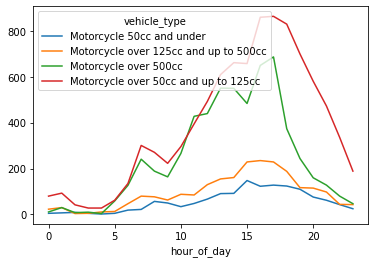

In [73]:
#  We can visualize the trend in each group using a line plot
hour_of_day.plot();

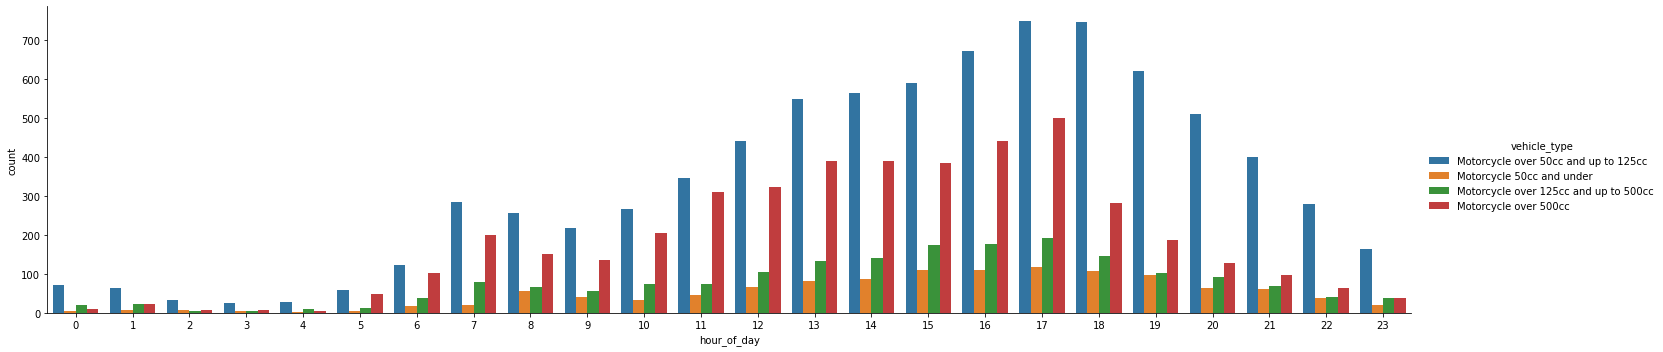

In [78]:
# We can also see the distribution of accident by hours of the day using bar chart
sns.catplot(x="hour_of_day", data=motorcycle_data, aspect=4.0, kind='count', hue='vehicle_type');

### The two graphs above show that most motorcycle accidents do happen between of 16:00 and 19:00 of the day. The type of motorcycle common for high accident are 'Motorcycle over 50cc and up to 125cc' and 'Motorcycle over 500cc'

In [81]:
# Group all casualties in an accident that happened per each days of the week for year 2020 for motocycles
day_of_week = motorcycle_data.pivot_table('number_of_casualties', index="day_of_week", 
                                        columns='vehicle_type', aggfunc='sum', fill_value=0)
day_of_week.head()

vehicle_type,Motorcycle 50cc and under,Motorcycle over 125cc and up to 500cc,Motorcycle over 500cc,Motorcycle over 50cc and up to 125cc
day_of_week,,,,
Friday,224,367,828,1553
Monday,192,310,750,1266
Saturday,221,300,914,1324
Sunday,118,352,1256,1045
Thursday,208,338,690,1516


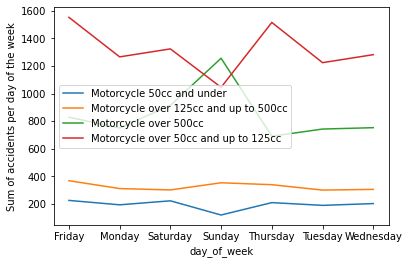

In [82]:
#  We can visualize the trend in each group using a line plot
motorcycle_data.pivot_table('number_of_casualties', index="day_of_week", 
                                        columns='vehicle_type', aggfunc='sum', fill_value=0).plot()
plt.ylabel('Sum of accidents per day of the week')
plt.legend(loc="center left");

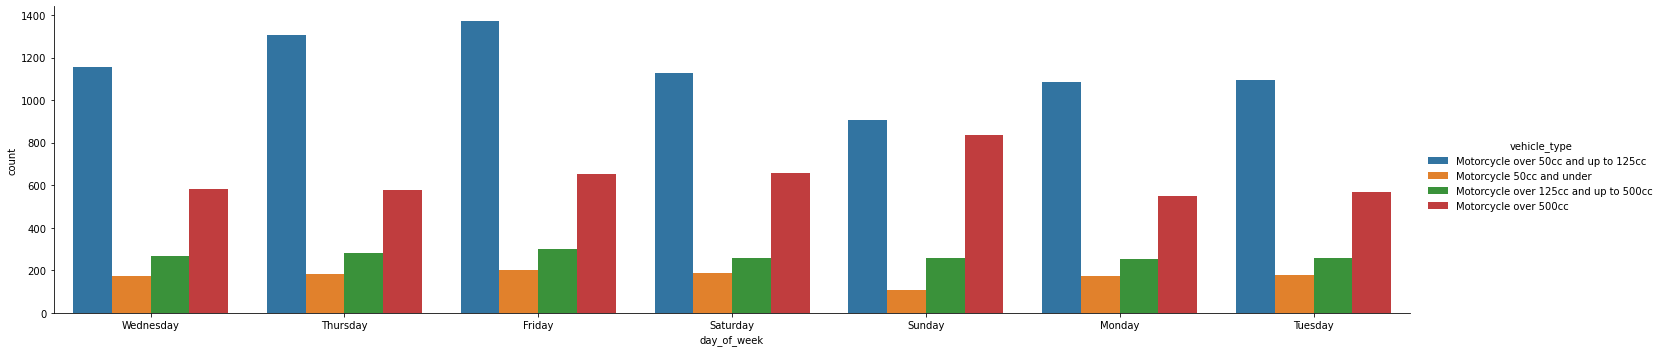

In [85]:
# We can also see the distribution of accident by hours of the day using bar chart
ax = sns.catplot(x="day_of_week", data=motorcycle_data, aspect=4.0, kind='count', hue='vehicle_type');

### The two graphs above show that most motorcycle accidents do happen between of Thursday and Friday of the week. The type of motorcycle common for high accident are 'Motorcycle over 50cc and up to 125cc' and 'Motorcycle over 500cc'

# Question 3

### For pedestrian involved in accident, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

In [9]:
# Group all casualties in an accident that happened per each hours of the day for year 2020 for 
# pedestrian_crossing_human_control
hour_of_day = accident_data.pivot_table('number_of_casualties', index='hour_of_day', 
        columns=['pedestrian_crossing_human_control'], aggfunc='sum', fill_value=0)
hour_of_day.head()

pedestrian_crossing_human_control,-1,0,1,2,9
hour_of_day,,,,,
0,5,4880,2,44,87
1,3,3566,4,52,97
2,1,2422,0,15,95
3,0,2228,3,22,74
4,0,1622,4,28,59


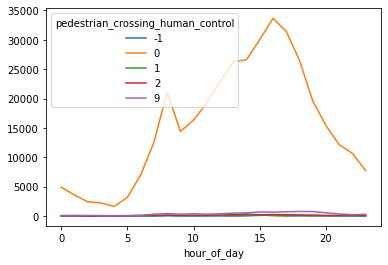

In [10]:
# We can also see the distribution of accident by hours of the day graphically
hour_of_day.plot();

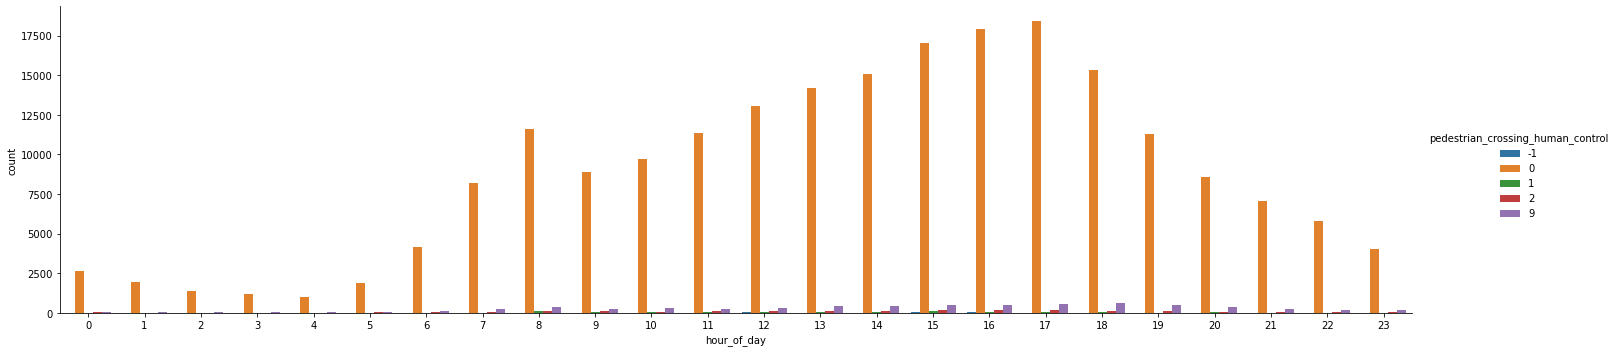

In [39]:
# We can also see the distribution of accident by hours of the day using bar chart
ax = sns.catplot(x="hour_of_day", data=accident_data, aspect=4.0, 
                 kind='count', hue='pedestrian_crossing_human_control');

In [11]:
# Group all casualties in an accident that happened per each hours of the day for year 2020 for 
# pedestrian_crossing_physical_facilities
hour_of_day = accident_data.pivot_table('number_of_casualties', index='hour_of_day', 
        columns=['pedestrian_crossing_physical_facilities'], aggfunc='sum', fill_value=0)
hour_of_day.head()

pedestrian_crossing_physical_facilities,-1,0,1,4,5,7,8,9
hour_of_day,,,,,,,,
0,4,4170,100,172,366,8,128,70
1,3,2730,150,166,510,1,71,91
2,1,2007,67,103,218,0,43,94
3,0,1873,65,119,187,2,35,46
4,0,1261,13,96,162,35,84,62


In [12]:
# We can also see the distribution of accident by hours of the day graphically
accident_data['pedestrian_crossing_physical_facilities'].unique()

array([ 9,  4,  0,  5,  1,  8,  7, -1], dtype=int64)

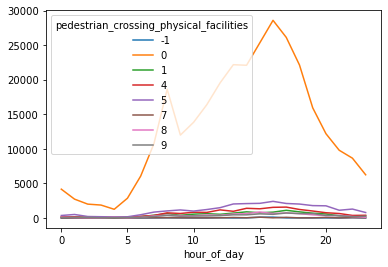

In [13]:
hour_of_day.plot();

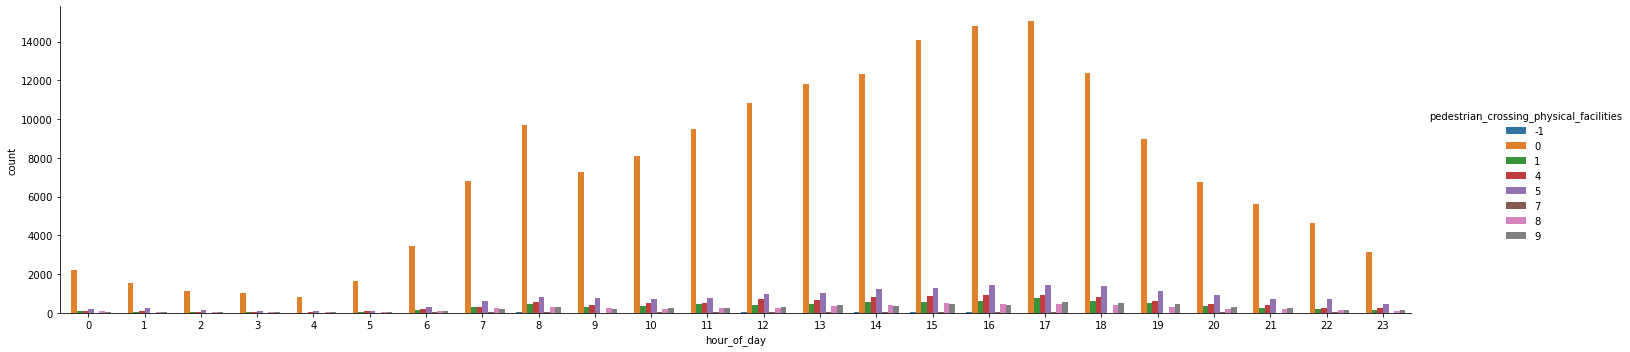

In [38]:
# We can also see the distribution of accident by hours of the day using bar chart
ax = sns.catplot(x="hour_of_day", data=accident_data, aspect=4.0, 
                 kind='count', hue='pedestrian_crossing_physical_facilities');

### The two graphs above show that most pedestrian  accidents do happen between hour of 15:00 and 17:00 of the day. The type of pedestrians  common for this high accident rate are those with No physical crossing facility within 50 metres

In [15]:
# Group all casualties in an accident that happened per each days of the week for year 2020 for 
# pedestrian_crossing_human_control
day_of_week = accident_data.pivot_table('number_of_casualties', index="day_of_week", 
                                        columns='pedestrian_crossing_human_control', aggfunc='sum', fill_value=0)
day_of_week.head()

pedestrian_crossing_human_control,-1,0,1,2,9
day_of_week,,,,,
Friday,29,59681,205,474,1507
Monday,43,50274,193,379,1210
Saturday,180,53809,157,309,1054
Sunday,122,46112,99,477,1150
Thursday,92,56275,141,427,1236


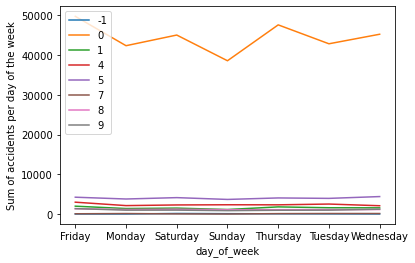

In [19]:
# We can also see the distribution of accident by hours of the day graphically
day_of_week.plot()
plt.ylabel('Sum of accidents per day of the week')
plt.legend(loc="upper left");

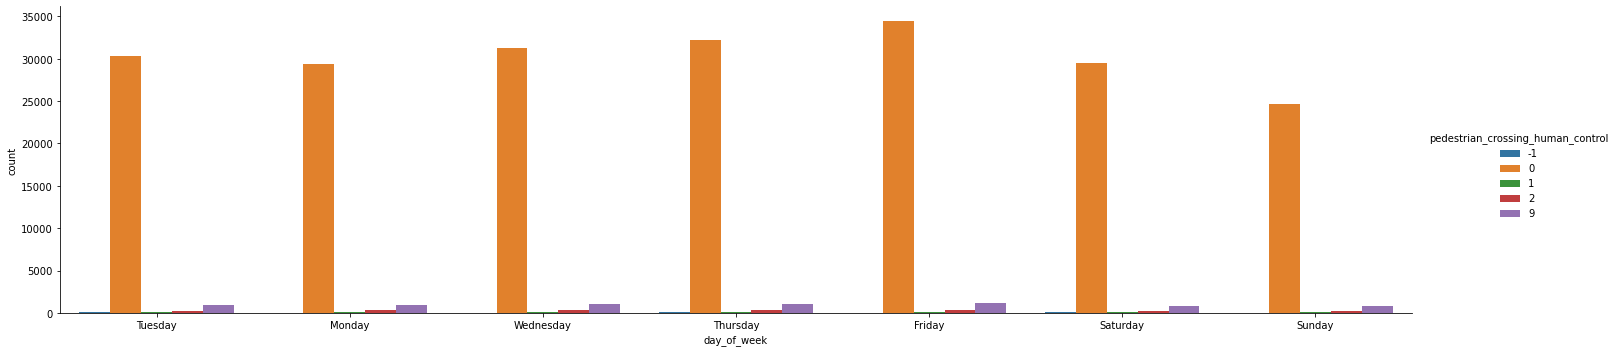

In [37]:
# We can also see the distribution of accident by hours of the day using bar chart
ax = sns.catplot(x="day_of_week", data=accident_data, aspect=4.0, 
                 kind='count', hue='pedestrian_crossing_human_control');

In [17]:
# Group all casualties in an accident that happened per each days of the week for year 2020 for
# pedestrian_crossing_physical_facilities
day_of_week = accident_data.pivot_table('number_of_casualties', index="day_of_week", 
                                        columns='pedestrian_crossing_physical_facilities', aggfunc='sum', fill_value=0)
day_of_week.head()

pedestrian_crossing_physical_facilities,-1,0,1,4,5,7,8,9
day_of_week,,,,,,,,
Friday,39,49730,2006,3011,4263,94,1354,1399
Monday,38,42349,1414,2152,3810,154,1175,1007
Saturday,173,45028,1520,2316,4156,67,1237,1012
Sunday,122,38566,1171,2362,3703,38,1113,885
Thursday,92,47585,1826,2347,4077,134,1129,981


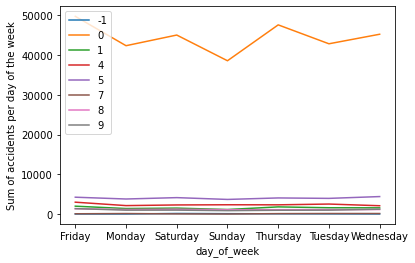

In [18]:
# We can also see the distribution of accident by hours of the day graphically
day_of_week.plot()
plt.ylabel('Sum of accidents per day of the week')
plt.legend(loc="upper left");

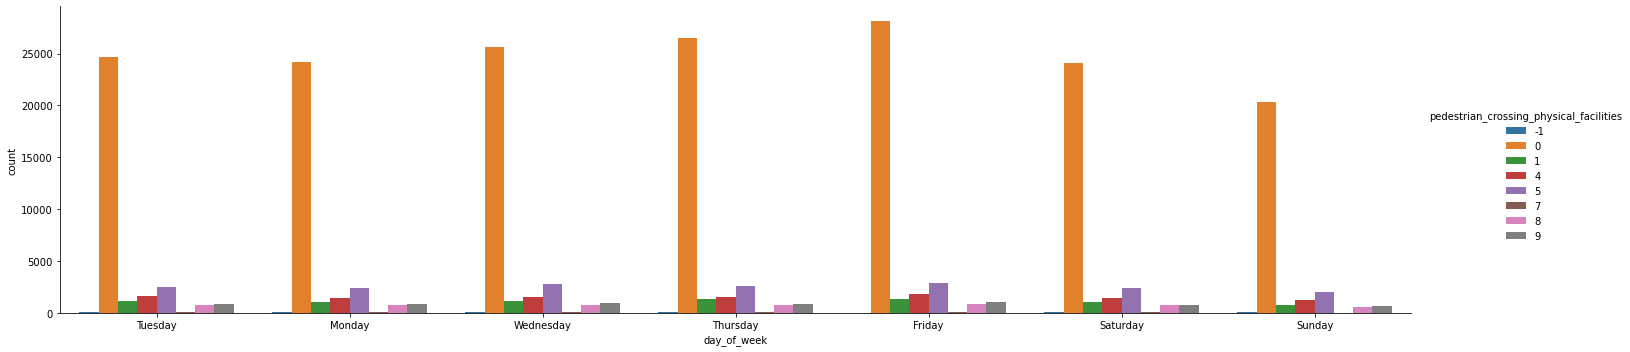

In [36]:
# We can also see the distribution of accident by hours of the day using bar chart
ax = sns.catplot(x="day_of_week", data=accident_data, aspect=4.0, 
                 kind='count', hue='pedestrian_crossing_physical_facilities');

### The two graphs above show that most pedestrian accidents do happen between Thursday  and Friday of the week. The type of pedestrians common for this high accident rate are those with No physical crossing facility within 50 metres

# Question 4

### Using the apriory algorithm, exploire the impact of selected variables on accident severity.

Here, I tried to select some useful columns that are necessary for this analysis. 

I selected time, road_surace_conditions, road_type, speed_limit, casualty_severity, casualty_type, vehicle_type, age_of_vehicle, sex_of_driver and age_of_driver.

I decided these columns because I believed they usually mosts time contribut to accident and even severity of accident. I also have to reduce to sample size of data to work with to 2000 samples before working with large samples slows down the execution time and makes take longer hours to compute the priory.

In [3]:
# select 2000 samples of the dataset based of the selected features.
selected_col = ['accident_severity', 'time', 'road_surface_conditions', 'road_type', 'speed_limit',
                'casualty_severity', 'casualty_type', 'vehicle_type', 'age_of_vehicle', 'sex_of_driver', 'age_of_driver']
apriory_data = accident_data.loc[:2000][selected_col]
apriory_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   accident_severity        2001 non-null   int64 
 1   time                     2001 non-null   object
 2   road_surface_conditions  2001 non-null   int64 
 3   road_type                2001 non-null   int64 
 4   speed_limit              2001 non-null   int64 
 5   casualty_severity        2001 non-null   int64 
 6   casualty_type            2001 non-null   int64 
 7   vehicle_type             2001 non-null   int64 
 8   age_of_vehicle           2001 non-null   int64 
 9   sex_of_driver            2001 non-null   int64 
 10  age_of_driver            2001 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 172.1+ KB


In [4]:
# transform the selected columns
apriory_data = pd.get_dummies(apriory_data)
apriory_data.head()

,accident_severity,road_surface_conditions,road_type,speed_limit,casualty_severity,casualty_type,vehicle_type,age_of_vehicle,sex_of_driver,age_of_driver,...,time_23:23,time_23:27,time_23:30,time_23:33,time_23:35,time_23:40,time_23:49,time_23:50,time_23:54,time_23:58
0,3,9,6,20,3,0,9,6,2,32,...,False,False,False,False,False,False,False,False,False,False
1,3,1,6,20,3,0,9,2,1,45,...,False,False,False,False,False,False,False,False,False,False
2,3,1,6,20,3,0,9,2,1,45,...,False,False,False,False,False,False,False,False,False,False
3,3,2,6,30,3,0,9,-1,3,-1,...,False,False,False,False,False,False,False,False,False,False
4,2,1,6,30,2,0,8,8,1,44,...,False,False,False,False,False,False,False,False,False,False


In [5]:
# Defining the hot encoding function to make the data suitable 
# for the concerned libraries
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1
  
# Encoding the datasets
pedestrian_encoded = apriory_data.applymap(hot_encode)
pedestrian = pedestrian_encoded

In [6]:
# import the required model to perform apriori
from mlxtend.frequent_patterns import apriori, association_rules

In [7]:
# Building the model to get relationship
pedestrian_items = apriori(pedestrian, min_support = 0.8, use_colnames = True)

# Collecting the inferred rules in a dataframe
rules = association_rules(pedestrian_items, metric ="confidence", min_threshold =0.7)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

C:\Users\Hp\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
83,(age_of_driver),(sex_of_driver),0.805097,0.997501,0.805097,1.000000,1.002505,0.002012,inf,0.012821
278,"(accident_severity, age_of_driver)",(sex_of_driver),0.805097,0.997501,0.805097,1.000000,1.002505,0.002012,inf,0.012821
281,(age_of_driver),"(sex_of_driver, accident_severity)",0.805097,0.997501,0.805097,1.000000,1.002505,0.002012,inf,0.012821
428,"(age_of_driver, road_surface_conditions)",(sex_of_driver),0.805097,0.997501,0.805097,1.000000,1.002505,0.002012,inf,0.012821
430,(age_of_driver),"(sex_of_driver, road_surface_conditions)",0.805097,0.997501,0.805097,1.000000,1.002505,0.002012,inf,0.012821
...,...,...,...,...,...,...,...,...,...,...
14027,(speed_limit),"(road_surface_conditions, sex_of_driver, age_o...",1.000000,0.802599,0.802599,0.802599,1.000000,0.000000,1.0,0.000000
14028,(road_type),"(road_surface_conditions, sex_of_driver, age_o...",1.000000,0.802599,0.802599,0.802599,1.000000,0.000000,1.0,0.000000
14029,(accident_severity),"(road_surface_conditions, sex_of_driver, age_o...",1.000000,0.802599,0.802599,0.802599,1.000000,0.000000,1.0,0.000000
14030,(casualty_severity),"(road_surface_conditions, sex_of_driver, age_o...",1.000000,0.802599,0.802599,0.802599,1.000000,0.000000,1.0,0.000000


In [18]:
rules[30:40]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1575,"(accident_severity, age_of_driver)","(sex_of_driver, vehicle_type)",0.805097,0.997501,0.805097,1.0,1.002505,0.002012,inf,0.012821
1577,"(age_of_driver, vehicle_type)","(sex_of_driver, accident_severity)",0.805097,0.997501,0.805097,1.0,1.002505,0.002012,inf,0.012821
1580,(age_of_driver),"(sex_of_driver, accident_severity, vehicle_type)",0.805097,0.997501,0.805097,1.0,1.002505,0.002012,inf,0.012821
1823,"(road_surface_conditions, age_of_driver, road_...",(sex_of_driver),0.805097,0.997501,0.805097,1.0,1.002505,0.002012,inf,0.012821
1827,"(age_of_driver, road_type)","(sex_of_driver, road_surface_conditions)",0.805097,0.997501,0.805097,1.0,1.002505,0.002012,inf,0.012821
1829,"(age_of_driver, road_surface_conditions)","(sex_of_driver, road_type)",0.805097,0.997501,0.805097,1.0,1.002505,0.002012,inf,0.012821
1832,(age_of_driver),"(sex_of_driver, road_surface_conditions, road_...",0.805097,0.997501,0.805097,1.0,1.002505,0.002012,inf,0.012821
1991,"(speed_limit, road_surface_conditions, age_of_...",(sex_of_driver),0.805097,0.997501,0.805097,1.0,1.002505,0.002012,inf,0.012821
1996,"(speed_limit, age_of_driver)","(sex_of_driver, road_surface_conditions)",0.805097,0.997501,0.805097,1.0,1.002505,0.002012,inf,0.012821
1997,"(age_of_driver, road_surface_conditions)","(sex_of_driver, speed_limit)",0.805097,0.997501,0.805097,1.0,1.002505,0.002012,inf,0.012821


### From the output, if will compare the antecedent support, consequent support, cofidence and support together, we will see that there is relationships between these fields as related to accident severity. 

### For example, age of driver and sex of driver can determine accident severity. Speed limit in connection with road type, age of vehicle, vehicle type etc. can lead to accident severity. 

### It is evidence here that all the features selected contribute to accident severity.

# Question 5

### Identify the accident in our region: Kingston Upon Hull, Humberside and East Ridding of Yorkshire etc. Run a cluster on this data. What do these clusters reveal about the distribution of accidents in our region

The following fields were selected from each of the table to form a single dataset for this practice.
lsoa.lsoa01nm, accident_year, accident_severity, number_of_casualties, day_of_week, time, road_surface_conditions, road_type, light_conditions, weather_conditions, speed_limit, pedestrian_crossing_human_control, pedestrian_crossing_physical_facilities, casualty_severity, casualty_class, casualty_type, pedestrian_location, pedestrian_road_maintenance_worker, vehicle_type, vehicle_manoeuvre, vehicle_location_restricted_lane, sex_of_driver, vehicle.age_of_driver, engine_capacity_cc, age_of_vehicle 
   
These columns were selected based of the following regions Kingston upon Hull, North Lincolnshire, North East Lincolnshire and East Riding of Yorkshire.

In [19]:
region_accident_data = ''
column_names = ''
# Create a function to read all records in accident table and form a dataframe object from it.
def readDataFromTable():
    
    global region_accident_data, column_names
    try:
        # make a connection to sqlite database
        sqlConnection = sqlite3.connect('accident_data_v1.0.0_2023.db')
        cursor = sqlConnection.cursor()
        print("Connected to SQLite")
        # select the colomns required for this analysis from the tables
        sql_select_query = """
            SELECT lsoa.lsoa01nm AS accident_region, accident.accident_year, accident.accident_severity, accident.number_of_casualties, accident.day_of_week, accident.time, 
            accident.road_surface_conditions, road_type, light_conditions, accident.weather_conditions, accident.speed_limit, 
            accident.pedestrian_crossing_human_control, accident.pedestrian_crossing_physical_facilities, casualty.casualty_severity, 
            casualty.casualty_class, casualty.casualty_type, casualty.pedestrian_location, casualty.pedestrian_road_maintenance_worker, 
            vehicle.vehicle_type, vehicle.vehicle_manoeuvre, vehicle.vehicle_location_restricted_lane, vehicle.sex_of_driver, vehicle.age_of_driver, 
            vehicle.engine_capacity_cc, vehicle.age_of_vehicle FROM lsoa JOIN accident ON accident.lsoa_of_accident_location = lsoa.lsoa01cd 
            JOIN casualty ON casualty.accident_reference = accident.accident_reference JOIN vehicle 
            ON vehicle.accident_reference = casualty.accident_reference WHERE (lsoa.lsoa01nm LIKE 'Kingston Upon Hull%' 
            OR accident.police_force=16 OR lsoa.lsoa01nm LIKE 'East Riding of Yorkshire%') AND accident.accident_year=2020;
        """
        
        # get all the columns of the table
        sqlConnection.row_factory = sqlite3.Row
        columns = sqlConnection.execute(sql_select_query)
        row = columns.fetchone()
        column_names = row.keys()
        
        # get all records from accident table
        cursor.execute(sql_select_query)
        records = cursor.fetchall()
        print("Total rows are:  ", len(records))
        
        # form a dataframe object from the records
        region_accident_data = pd.DataFrame(records, columns=column_names)
        
        # close the connection
        cursor.close()

    except sqlite3.Error as error:
        print("Failed to read data from sqlite table", error)
    finally:
        if sqlConnection:
            sqlConnection.close()
            print("The connection is closed")

readDataFromTable()

# display a sample of the records in the dataframe object
region_accident_data.head()

Connected to SQLite
Total rows are:   3985
The connection is closed


,accident_region,accident_year,accident_severity,number_of_casualties,day_of_week,time,road_surface_conditions,road_type,light_conditions,weather_conditions,...,casualty_type,pedestrian_location,pedestrian_road_maintenance_worker,vehicle_type,vehicle_manoeuvre,vehicle_location_restricted_lane,sex_of_driver,age_of_driver,engine_capacity_cc,age_of_vehicle
0,Kingston upon Hull 028E,2020,3,1,5,11:20,1,6,1,1,...,9,0,0,9,9,0,1,24,1248,11
1,Kingston upon Hull 028E,2020,3,1,5,11:20,1,6,1,1,...,9,0,0,19,5,0,1,48,1968,5
2,North Lincolnshire 022C,2020,3,1,5,16:17,1,6,4,1,...,9,0,0,9,17,0,1,30,-1,-1
3,Kingston upon Hull 002E,2020,2,1,5,17:30,1,6,4,1,...,0,5,0,8,18,0,1,37,-1,-1
4,North East Lincolnshire 003C,2020,3,1,5,22:50,1,3,4,1,...,9,0,0,9,4,6,2,41,1124,12


## Perform Data Exploration and Processing

In [20]:
# check for basic information about the dataset
region_accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3985 entries, 0 to 3984
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   accident_region                          3985 non-null   object
 1   accident_year                            3985 non-null   int64 
 2   accident_severity                        3985 non-null   int64 
 3   number_of_casualties                     3985 non-null   int64 
 4   day_of_week                              3985 non-null   int64 
 5   time                                     3985 non-null   object
 6   road_surface_conditions                  3985 non-null   int64 
 7   road_type                                3985 non-null   int64 
 8   light_conditions                         3985 non-null   int64 
 9   weather_conditions                       3985 non-null   int64 
 10  speed_limit                              3985 non-null   int

### The dataset contains 3985 rows by 25 columns. 23 integer and 2 string columns. Each column is clean with no none values

In [5]:
# verify how many regions were represented in the dataset
region_accident_data["accident_region"].unique()

array(['Kingston upon Hull 028E', 'North Lincolnshire 022C',
       'Kingston upon Hull 002E', 'North East Lincolnshire 003C',
       'Kingston upon Hull 016D', 'North East Lincolnshire 016C',
       'Kingston upon Hull 026D', 'North Lincolnshire 006D',
       'East Riding of Yorkshire 014A', 'East Riding of Yorkshire 007H',
       'North East Lincolnshire 019A', 'East Riding of Yorkshire 033C',
       'Kingston upon Hull 019D', 'Kingston upon Hull 029D',
       'North Lincolnshire 012B', 'Kingston upon Hull 031D',
       'North Lincolnshire 004D', 'East Riding of Yorkshire 040D',
       'North Lincolnshire 001C', 'North East Lincolnshire 021B',
       'North East Lincolnshire 003B', 'East Riding of Yorkshire 014D',
       'Kingston upon Hull 027B', 'North Lincolnshire 005A',
       'North East Lincolnshire 004C', 'East Riding of Yorkshire 011F',
       'North East Lincolnshire 014D', 'North Lincolnshire 002A',
       'North East Lincolnshire 017B', 'North East Lincolnshire 016B',
    

#### The output above indicates that there are four major regions but they were represented in different region codes.  We have to remove this code and marge all code with the same region name into the same region.

In [21]:
# convert each region code to their root region
region_list = []
for region in region_accident_data["accident_region"]:
    if region.startswith('Kingston upon Hull'):
        region_list.append('Kingston upon Hull')
    elif region.startswith('North Lincolnshire'):
        region_list.append('North Lincolnshire')
    elif region.startswith('North East Lincolnshire'):
        region_list.append('North East Lincolnshire')
    else:
        region_list.append('East Riding of Yorkshire')
region_accident_data["accident_region"] = region_list
region_accident_data["accident_region"].unique()

array(['Kingston upon Hull', 'North Lincolnshire',
       'North East Lincolnshire', 'East Riding of Yorkshire'],
      dtype=object)

## Perform Data Analysis

In [22]:
# Group all casualties in an accident that happened by each region for year 2020
accident_by_region = region_accident_data.pivot_table('number_of_casualties', index="accident_region", 
                                        columns='accident_severity', aggfunc='sum', fill_value=0)
accident_by_region.head()

accident_severity,1,2,3
accident_region,,,
East Riding of Yorkshire,41,445,1516
Kingston upon Hull,17,373,1411
North East Lincolnshire,20,222,847
North Lincolnshire,60,424,1243


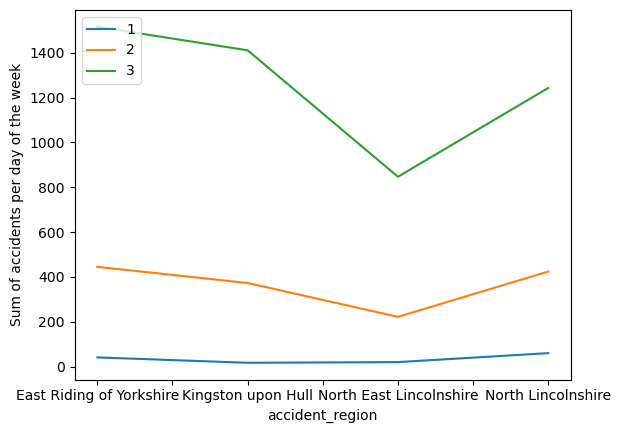

In [9]:
# plt.figure(figsize=(10, 8))
accident_by_region.plot()
plt.ylabel('Sum of accidents per day of the week')
plt.legend(loc="upper left");

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


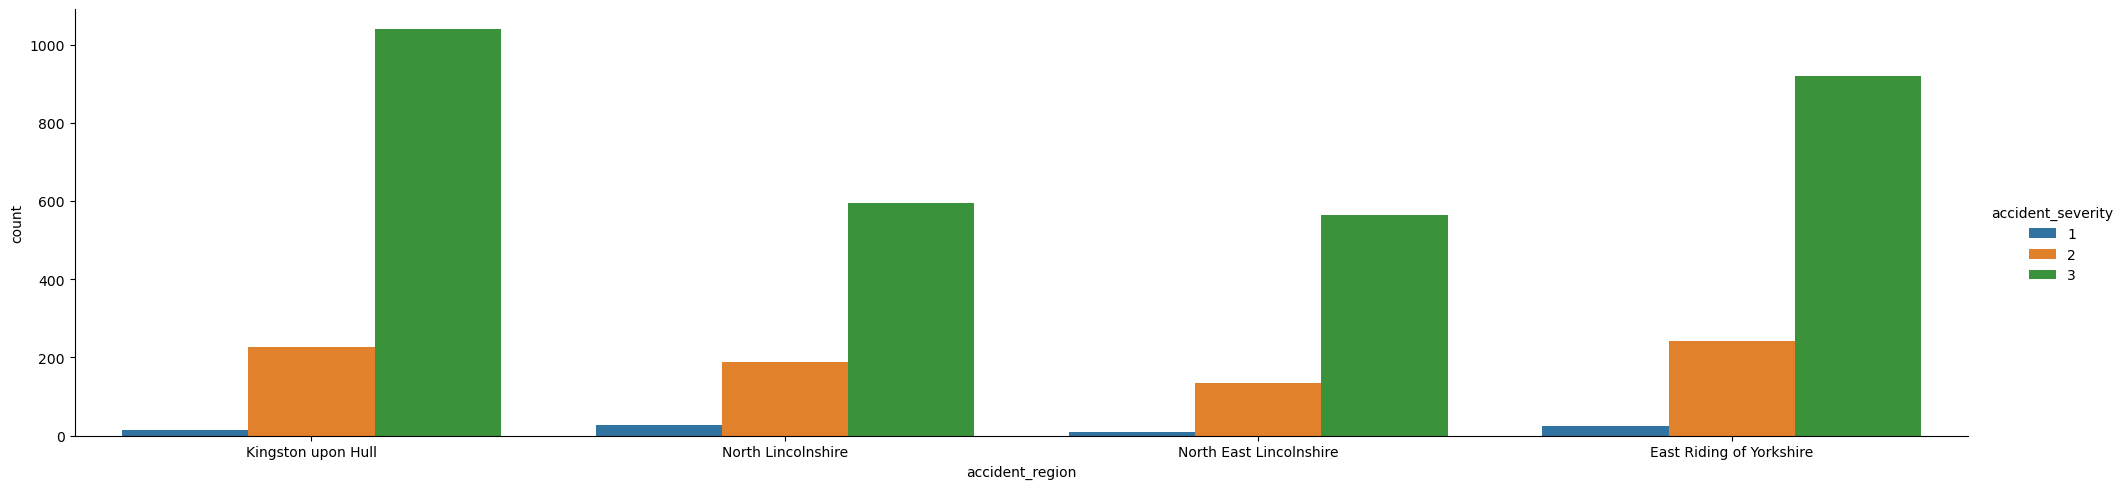

In [23]:
# We can also see the distribution of accident by hours of the day using bar chart
ax = sns.catplot(x="accident_region", data=region_accident_data, aspect=4.0, 
                 kind='count', hue='accident_severity');

### This indicates that for each region, there are more slight accident casualties than serious and fatai accidents

## Feature Engineering

In [24]:
# separate the dataset into both target and features and drop some unuseful columns
target = region_accident_data["accident_region"]
features = region_accident_data.drop(["accident_region", "time"], axis=1)

# transform the accident_severity column back to its numerical value
features["accident_severity"].replace({"Fatal":1, "Serious":2, "Slight":3}, inplace=True)

# check if all columns are intact
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3985 entries, 0 to 3984
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   accident_year                            3985 non-null   int64
 1   accident_severity                        3985 non-null   int64
 2   number_of_casualties                     3985 non-null   int64
 3   day_of_week                              3985 non-null   int64
 4   road_surface_conditions                  3985 non-null   int64
 5   road_type                                3985 non-null   int64
 6   light_conditions                         3985 non-null   int64
 7   weather_conditions                       3985 non-null   int64
 8   speed_limit                              3985 non-null   int64
 9   pedestrian_crossing_human_control        3985 non-null   int64
 10  pedestrian_crossing_physical_facilities  3985 non-null   int64
 11  casu

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


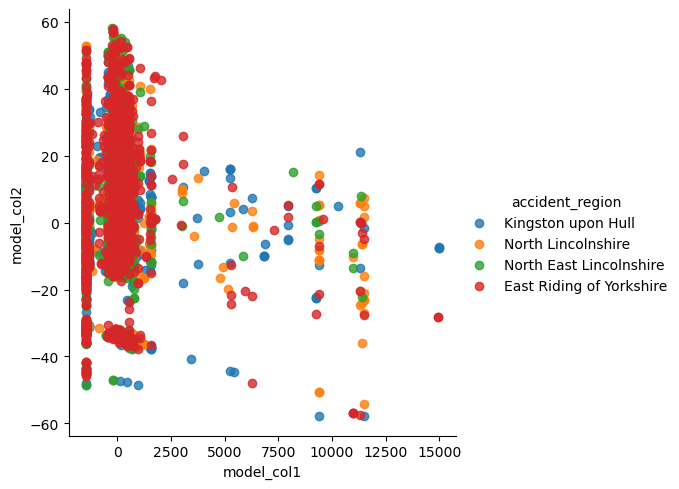

In [28]:
# Using principal component analysis to perform dimensionality reduction of the dataset
from sklearn.decomposition import PCA 
import seaborn as sns
model = PCA(n_components=2) 
model.fit(features) 
X_model = model.transform(features)
# Now let’s plot the results. A quick way to do this is to insert the results into the 
# DataFrame, and use Seaborn’s lmplot to show the results 
region_accident_data['model_col1'] = X_model[:, 0]
region_accident_data['model_col2'] = X_model[:, 1]
sns.lmplot(x="model_col1", y="model_col2", hue='accident_region', data=region_accident_data, fit_reg=False);

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


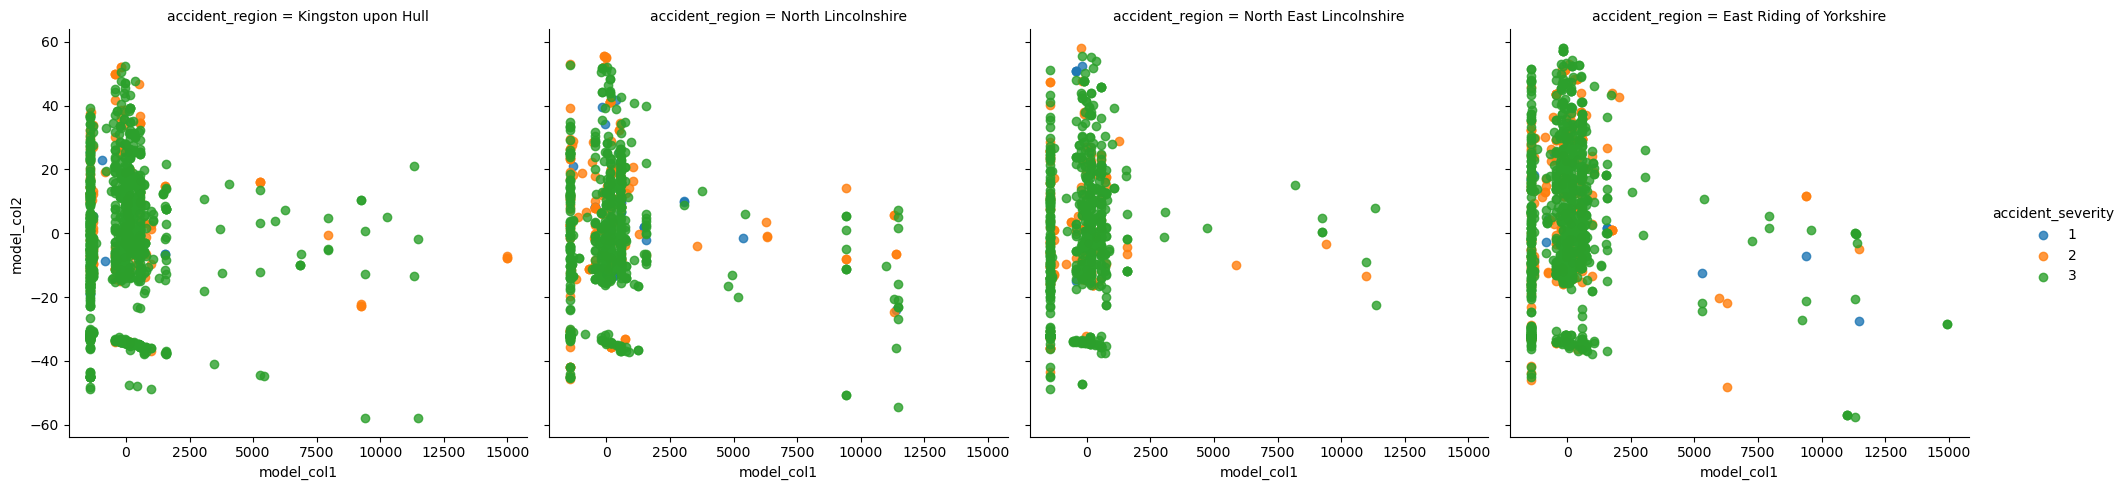

In [29]:
# we will use a powerful clustering method called a Gaussian mixture model (GMM) to cluster the dataset
from sklearn import mixture
model = mixture.GaussianMixture(n_components=4, covariance_type='full') 
model.fit(X_model) 
# Determine cluster labels
y_gmm = model.predict(X_model) 
# As before, we will add the cluster label to the DataFrame and use Seaborn to plot the
# results 
region_accident_data['cluster'] = y_gmm
# region_accident_data
sns.lmplot(x="model_col1", y="model_col2", data=region_accident_data, hue='accident_severity', col='accident_region', fit_reg=False);

### The cluster further proves the above analysis that for each region, there are more slight accident casualties than serious and fatai accidents

# Question 6

### Using outlier detection method, identify unusual entries in the dataset. Should you keep these entries in your data? 

In [178]:
# Detecting outlier in each columns of the dataset
# we try to make a copy of this column_name in order not to alter the integrity of the dataset and remove unuseful columns
outlier_columns = column_names.copy()
outlier_columns.remove("accident_region")
outlier_columns.remove("time")

def indicies_of_outliers(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))

# Run function
for column in outlier_columns:
    outlier = indicies_of_outliers(region_accident_data[column].unique())[0]
    if outlier.size != 0:
        print("for column :"+ column)
        print("total number of outlier: ", outlier.size)
        print(outlier)

for column :number_of_casualties
total number of outlier:  1
[5]
for column :casualty_type
total number of outlier:  3
[ 5 12 15]
for column :vehicle_type
total number of outlier:  3
[ 5 13 14]
for column :engine_capacity_cc
total number of outlier:  38
[ 44  62  65  74  76  91  92  98 101 111 116 121 123 124 125 127 130 135
 137 138 156 157 165 169 178 179 187 192 194 196 202 209 226 227 232 243
 257 260]
for column :age_of_vehicle
total number of outlier:  2
[32 35]


### The output values detected in each of these columns as outliers are not much and can be deleted from dataset. 

# Question 7

### Can you develop a classification model using the provided data that accurately predicts fatai injuries sustained in road traffic accident with the aim of informing and improving road safety measure.

In [30]:
# Select all columns that are required to develop a classification model from all the tables
fatai_accident_data = ''
column_names = ''
# Create a function to read all records in accident table and form a dataframe object from it.
def readDataFromTable():
    
    global fatai_accident_data, column_names
    try:
        # make a connection to sqlite database
        sqlConnection = sqlite3.connect('accident_data_v1.0.0_2023.db')
        cursor = sqlConnection.cursor()
        print("Connected to SQLite")
        # select the colomns required for analysis from the tables
        sql_select_query = """
            SELECT accident.accident_year, accident.accident_severity, accident.number_of_casualties, accident.day_of_week, accident.time, 
            accident.road_surface_conditions, road_type, light_conditions, accident.weather_conditions, accident.speed_limit, 
            accident.pedestrian_crossing_human_control, accident.pedestrian_crossing_physical_facilities, casualty.casualty_severity, 
            casualty.casualty_class, casualty.casualty_type, casualty.pedestrian_location, casualty.pedestrian_road_maintenance_worker, 
            vehicle.vehicle_type, vehicle.vehicle_manoeuvre, vehicle.vehicle_location_restricted_lane, vehicle.sex_of_driver, vehicle.age_of_driver, 
            vehicle.engine_capacity_cc, vehicle.age_of_vehicle FROM accident JOIN casualty ON casualty.accident_reference = accident.accident_reference
            JOIN vehicle ON vehicle.accident_reference = casualty.accident_reference WHERE accident.accident_year=2020;
        """
        
        # get all the columns of the table
        sqlConnection.row_factory = sqlite3.Row
        columns = sqlConnection.execute(sql_select_query)
        row = columns.fetchone()
        column_names = row.keys()
        
        # get all records from accident table
        cursor.execute(sql_select_query)
        records = cursor.fetchall()
        print("Total rows are:  ", len(records))
        
        # form a dataframe object from the records
        fatai_accident_data = pd.DataFrame(records, columns=column_names)
        
        # close the connection
        cursor.close()

    except sqlite3.Error as error:
        print("Failed to read data from sqlite table", error)
    finally:
        if sqlConnection:
            sqlConnection.close()
            print("The connection is closed")

readDataFromTable()

# display a sample of the records in the dataframe object
fatai_accident_data.head()

Connected to SQLite
Total rows are:   221631
The connection is closed


,accident_year,accident_severity,number_of_casualties,day_of_week,time,road_surface_conditions,road_type,light_conditions,weather_conditions,speed_limit,...,casualty_type,pedestrian_location,pedestrian_road_maintenance_worker,vehicle_type,vehicle_manoeuvre,vehicle_location_restricted_lane,sex_of_driver,age_of_driver,engine_capacity_cc,age_of_vehicle
0,2020,3,1,3,09:00,9,6,1,9,20,...,0,9,0,9,5,0,2,32,1968,6
1,2020,3,2,2,13:55,1,6,1,1,20,...,0,1,0,9,4,0,1,45,1395,2
2,2020,3,2,2,13:55,1,6,1,1,20,...,0,1,0,9,4,0,1,45,1395,2
3,2020,3,1,4,01:25,2,6,4,1,30,...,0,5,0,9,18,0,3,-1,-1,-1
4,2020,2,1,4,01:50,1,6,4,1,30,...,0,4,0,8,18,0,1,44,1798,8


## Data Exploratory and Processing

In [31]:
# get some basic insights from the dataset
fatai_accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221631 entries, 0 to 221630
Data columns (total 24 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   accident_year                            221631 non-null  int64 
 1   accident_severity                        221631 non-null  int64 
 2   number_of_casualties                     221631 non-null  int64 
 3   day_of_week                              221631 non-null  int64 
 4   time                                     221631 non-null  object
 5   road_surface_conditions                  221631 non-null  int64 
 6   road_type                                221631 non-null  int64 
 7   light_conditions                         221631 non-null  int64 
 8   weather_conditions                       221631 non-null  int64 
 9   speed_limit                              221631 non-null  int64 
 10  pedestrian_crossing_human_control        221

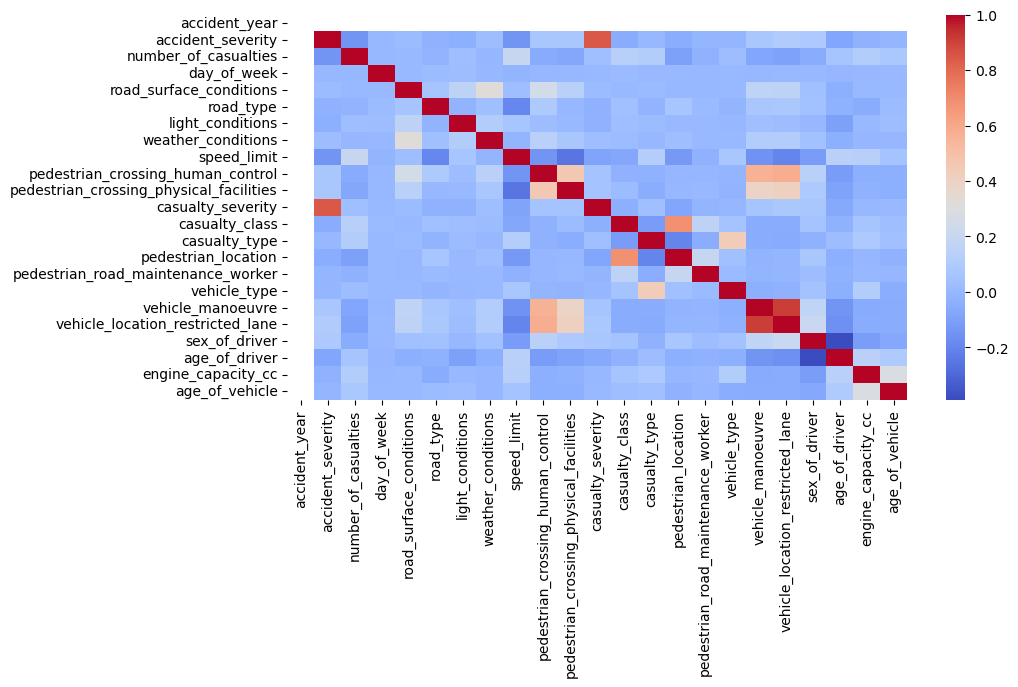

In [32]:
# find the correlation of each columns to each other especially to accident_severity column which we are predicting
fatai_accident_data.drop(['time'], axis=1, inplace=True)
correlations = fatai_accident_data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(correlations, cmap="coolwarm");

accident_severity
1    217386
0      4245
Name: count, dtype: int64


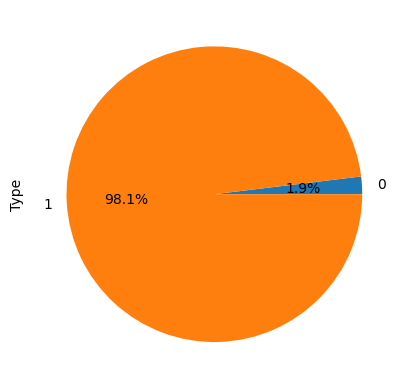

In [33]:
# Since we are only intereste in predicting either it's fatai accident or not, then we have to merge other categories 
# of accident severity together. So we try to binarize the column
fatai_accident_data["accident_severity"] = np.where((fatai_accident_data["accident_severity"] == 1), 0, 1)
print(fatai_accident_data["accident_severity"].value_counts())

# Let's verify if the two classes are balanced
fatai_accident_data.groupby("accident_severity").size().plot(kind='pie',
                                       y = "accident_severity",
                                       label = "Type",
                                       autopct='%1.1f%%');

In [34]:
# Let's try to get the actual total value in each categories
fatai = fatai_accident_data[fatai_accident_data["accident_severity"] == 0] 
non_fatai  = fatai_accident_data[fatai_accident_data["accident_severity"] == 1]
print(fatai.shape)
print(non_fatai.shape)

(4245, 23)
(217386, 23)


### The percentage of fatai accident (0) and non-fatai accident is 1.9% with total value of 4245 and 98.1% with a total value of 217386. This shows there is an imbalance in the categories and this has to be corrected. 

In [35]:
# To make the class balance we will try to perform upscalling to make the lesser class equal to the higher class
from sklearn.utils import resample
fatai_upsample = resample(fatai,
             replace=True,
             n_samples=len(non_fatai),
             random_state=42)

print(fatai_upsample.shape)

(217386, 23)


accident_severity
0    217386
1    217386
Name: count, dtype: int64


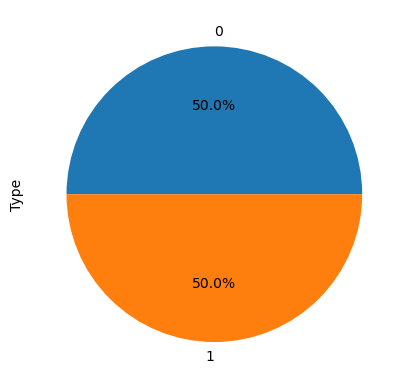

In [36]:
# Let's try and verify again if there is now a balance categories
accident_severity = pd.concat([fatai_upsample, non_fatai])

print(accident_severity["accident_severity"].value_counts())

accident_severity.groupby("accident_severity").size().plot(kind='pie',
                                       y = "accident_severity",
                                       label = "Type",
                                       autopct='%1.1f%%');

### Now each category is having total number of 217386 and from the chart each is now 50%. This means there is now a balance class in the column. The next step is to merge the categories back into the column

In [37]:
# # Let's verify if the two classes are balanced
# fatai_accident_data.groupby("accident_severity").size().plot(kind='pie',
#                                        y = "accident_severity",
#                                        label = "Type",
#                                        autopct='%1.1f%%');

In [38]:
# Now let's separate the dataset into feature matrix and target vector
target = fatai_accident_data["accident_severity"]
features = fatai_accident_data.drop(["accident_severity"], axis=1)
print(features.shape)
print(target.shape)

(221631, 22)
(221631,)


In [39]:
# import all the necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [40]:
# We need to break the data into training and test
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 42)

In [41]:
# Because of outlier detected ealier there is a need to rescale the data
scaler = StandardScaler()
# Transform the feature
standardized = scaler.fit_transform(x_train)
# Show feature
standardized

array([[ 0.        ,  0.94872236, -0.06442843, ..., -0.05328391,
        -0.10440819,  0.78609592],
       [ 0.        ,  0.94872236, -1.60624925, ..., -0.54254315,
         0.36885483,  0.78609592],
       [ 0.        , -0.55448736, -1.60624925, ...,  0.04456794,
        -0.91469186, -1.1284094 ],
       ...,
       [ 0.        , -0.55448736, -0.57836871, ..., -0.88502463,
        -0.83320718,  2.0624328 ],
       [ 0.        , -0.55448736, -1.60624925, ...,  0.09349386,
        -0.91469186, -1.1284094 ],
       [ 0.        , -0.55448736,  0.44951184, ...,  0.63167903,
         1.0200804 ,  1.10518014]])

In [42]:
# Create a function with some Machine Learning Models so we can choose the best model
def models(X_train,Y_train):
  
      # Using Logistic Regression Algorithm for the Training Set
      from sklearn.linear_model import LogisticRegression
      log = LogisticRegression(random_state = 0)
      log.fit(X_train, Y_train)

      # Using KNeighborsClassifier Algorithm for the Training Set
      from sklearn.neighbors import KNeighborsClassifier
      knn = KNeighborsClassifier()
      knn.fit(X_train, Y_train)

      # Using DecisionTreeClassifier of tree class Algorithm for the Training Set
      from sklearn.tree import DecisionTreeClassifier
      tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
      tree.fit(X_train, Y_train)

      # Using RandomForestClassifier method of ensemble class Algorithm for the Training Set
      from sklearn.ensemble import RandomForestClassifier
      forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
      forest.fit(X_train, Y_train)

      # print model accuracy on the training data.
      print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
      print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
      print('[2]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
      print('[3]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))

      return log, knn, tree, forest

In [43]:
# Get and train all of the models
model = models(standardized, y_train)

[0]Logistic Regression Training Accuracy: 0.9917279798824471
[1]K Nearest Neighbor Training Accuracy: 0.9940561775446238
[2]Decision Tree Classifier Training Accuracy: 1.0
[3]Random Forest Classifier Training Accuracy: 0.9997292793416074


In [44]:
# Let's make prediction on the test data and get the confusion matrix, and test accuracy of each model
from sklearn.metrics import confusion_matrix 
for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(scaler.transform(x_test))) 
    #extracting TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(scaler.transform(x_test))).ravel()
    print(model[i])
    print("Confusion matrix \n", cm)
    print('Testing Accuracy = "{} !"'.format((TP + TN) / (TP + TN + FN + FP)))
    print()# Print a new line

LogisticRegression(random_state=0)
Confusion matrix 
 [[  602   464]
 [   22 54320]]
Testing Accuracy = "0.9912287034363269 !"

KNeighborsClassifier()
Confusion matrix 
 [[  681   385]
 [   31 54311]]
Testing Accuracy = "0.9924920589084608 !"

DecisionTreeClassifier(criterion='entropy', random_state=0)
Confusion matrix 
 [[  855   211]
 [  178 54164]]
Testing Accuracy = "0.9929793531619983 !"

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)
Confusion matrix 
 [[  818   248]
 [   15 54327]]
Testing Accuracy = "0.9952533930118395 !"



In [54]:
# We will choose DecisiontreeClassifier, predict on the test data and create a classification report
decisionT = model[2]
y_pred = decisionT.predict(scaler.transform(x_test))
print(classification_report(y_test, y_pred, target_names=["Fatai", "Non-fatai"]))

              precision    recall  f1-score   support

       Fatai       0.83      0.80      0.81      1066
   Non-fatai       1.00      1.00      1.00     54342

    accuracy                           0.99     55408
   macro avg       0.91      0.90      0.91     55408
weighted avg       0.99      0.99      0.99     55408



### Looking through the training accuracy, test accuracy and classification report, DecisionTreeClassifier models performed better.

### With this report, it means giving the necessary information, this model can predict if there will be fatai accident or not. This can help to improve road traffic and minimize accident on the road.